# 1_Initialization

In [1]:
from safedigital import mechanical as ME  # import mechanical module
from datetime import datetime
from datetime import timedelta
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib

# from MRC.sswgmm_mech import mech_monitor as mm
sns.set(color_codes=True)
cur_directory = r'C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics'
dir_data_washed = (cur_directory + '\\' + 
                  '20221112_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000' + '\\'
                  + '1_Data formatted')
dir_data_raw = (cur_directory + '\\' +
                '20221112_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000' + '\\' +
                '0_Data original')


# 2_Data washing
## 2.1_Data re-orgnization 
Save every curve into one .csv file

In [2]:
# for all data, split and save each curve into one single .csv file
travel_path_list = []
wave_class_dict = {'角度(合闸).txt':'travel_close', '角度(分闸).txt':'travel_open', 
                   '合闸电流(合闸).txt':'current_close', '分闸电流(分闸).txt':'current_open', 
                   '储能电流(储能).txt':'current_motor'}
for cur_dir, dirs, files in os.walk(dir_data_raw):
    print(cur_dir)
    for wave_class in wave_class_dict.keys():
        if wave_class in files:            
            wave_path = os.path.join(cur_dir, wave_class)
            # print(travel_path)
            travel_path_list.append(wave_path)
            with open(wave_path, "r", encoding='utf-8') as f: 
                data = f.read()
            wave_list = data.split("WaveID:")
            # since the 1st element is blank, wave data splitting from 2nd element
            for wave_str in wave_list[1:]:
                # extract timestamp to be name of waveform file
                time_stamp_start_idx = wave_str.find('Waveform time:') + len('Waveform time:')
                time_stamp_end_idx = wave_str.find(';Sampling frequency(ms)')
                time_stamp_str = wave_str[time_stamp_start_idx : time_stamp_end_idx]
                
                # change format of time stamp into 'XX_XX_XX'
                time_stamp_num = time_stamp_str.replace(' ', '_')
                time_stamp_num = time_stamp_num.replace(':', '_')
                time_stamp_num = time_stamp_num.replace('-', '_')
                
                # extract waveform data
                wave_data_start_idx = wave_str.find('Waveform data:') + len('Waveform data:')
                wave_data_str = wave_str[wave_data_start_idx:]
                wave_data_df = pd.DataFrame({'data':wave_data_str.split(',')})
                
                # export data into .csv file
                wave_file_name = time_stamp_num + '_' + wave_class_dict[wave_class]
                wave_data_df.to_csv(dir_data_washed + '\\' + wave_file_name + '.csv')
                    
                    
            else:
                pass
    else:
        pass
print(travel_path_list)


C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221112_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\0_Data original
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221112_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\0_Data original
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221112_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\0_Data original\20221122-14-43   500c
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221112_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\0_Data original\20221122-500--712
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221112_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\0_Data original\20221122-712 --974
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221112_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\0_Data original\20221122-9-48
C:\Users\cnbofa

## 3.2_Data preview
### 3.2.1_Travel open

number of open trave curves: 5099


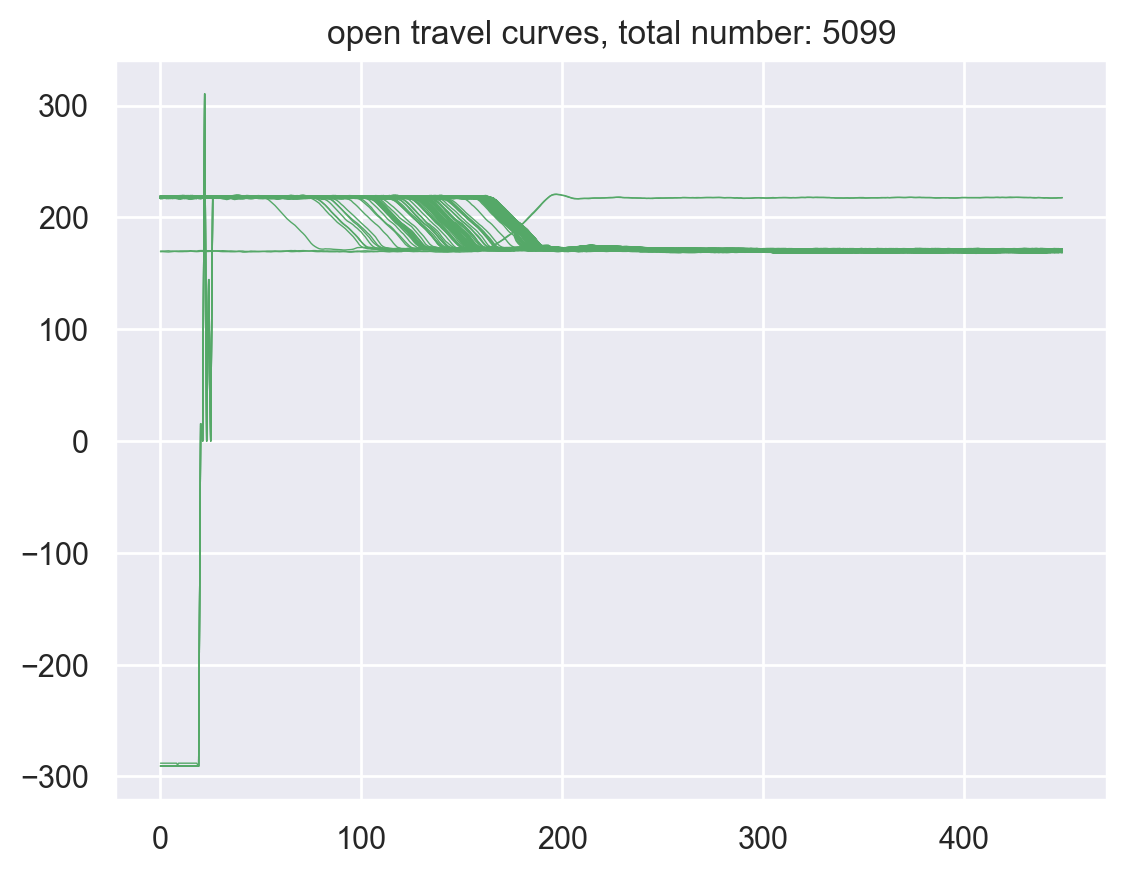

In [7]:
count_travel_open = 0
for cur_dir, dirs, files in os.walk(dir_data_washed):
    
    # plot open travel curve
    plt.figure(dpi=200)
    for file in files:

        if 'travel_open' in file:
            count_travel_open += 1
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            plt.plot(curve_df['data'],
                     c='g',
                     linewidth=0.5)
plt.title('open travel curves, total number: {}'.format(count_travel_open))
print('number of open trave curves:', count_travel_open)           

### 3.2.2_Travel close

number of close trave curves: 5363


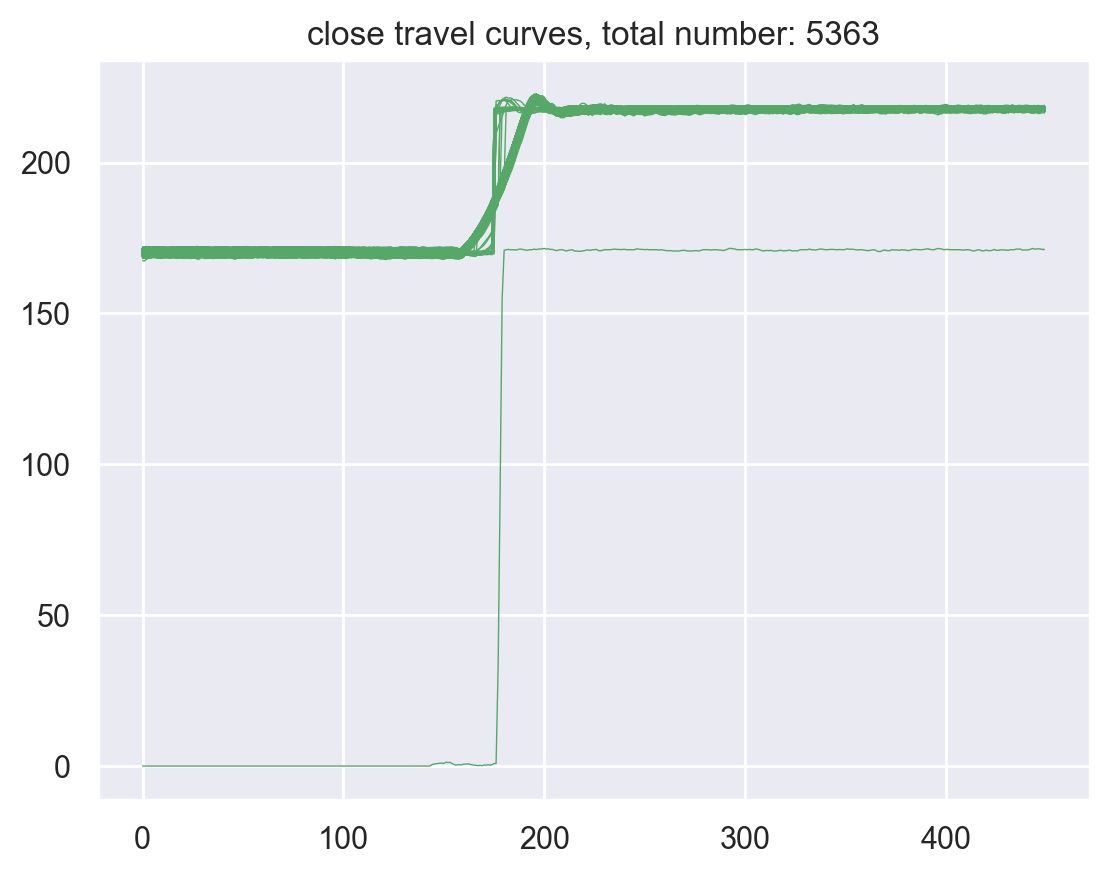

In [9]:
count_travel_close = 0
for cur_dir, dirs, files in os.walk(dir_data_washed):
    
    # plot open travel curve
    plt.figure(dpi=200)
    for file in files:

        if 'travel_close' in file:
            count_travel_close += 1
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            plt.plot(curve_df['data'],
                     c='g',
                     linewidth=0.5)
plt.title('close travel curves, total number: {}'.format(count_travel_close))
print('number of close trave curves:', count_travel_close) 

## 3.3_Data filtering 1: 
all angle values within threshold (100,250)
### 3.3.1_Travel open

In [ ]:
importlib.reload(ME)
count_invalid = 0
valid_open_file_list, invalid_open_file_list = [], []
fig1, ax1  = plt.subplots()
fig2, ax2 = plt.subplots()
fig_2k,ax_2k = plt.subplots()
fig_4k,ax_4k = plt.subplots()
fig_6k,ax_6k = plt.subplots()
fig_8k,ax_8k = plt.subplots()
fig_10k,ax_10k = plt.subplots()
date_time_2k = datetime(2022,10,17)
date_time_4k = datetime(2022,10,21)
date_time_6k = datetime(2022,10,29)
date_time_8k = datetime(2022,11,8)
date_time_10k = datetime(2022,11,13)
for cur_dir, dirs, files in os.walk(dir_data_washed):
    
    # plot open travel curve   
    for file in files:
        if 'travel_open' in file:
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            curve_ndarray = curve_df['data'].values
            valid_bool = ME.DataClean.curve_check_thresholds(curve_ndarray, 
                                                             250, 
                                                             100,
                                                             ratio_thr=0.1)
            if valid_bool:
                ax1.plot(curve_df['data'],
                         c='g',
                         linewidth=0.5)
                valid_open_file_list.append(file)
                file_sep_list = file.split('_')
                time_stamp_str = ''
                for i in range(6):
                    time_stamp_str = time_stamp_str + file_sep_list[i] + '_'
                # print('time_stamp_str', time_stamp_str)
                time_stamp_dt = datetime.strptime(time_stamp_str, '%Y_%m_%d_%H_%M_%S_')
                # plot every 2000 cycles
                if ((time_stamp_dt - date_time_2k).days <= 0):
                    ax_2k.plot(curve_df['data'],
                                 c='k',
                                 linewidth=0.5)
                elif (((time_stamp_dt - date_time_2k).days > 0) 
                      & ((time_stamp_dt - date_time_4k).days <= 0)):
                    ax_4k.plot(curve_df['data'],
                               c='k',
                               linewidth=0.5)
                elif (((time_stamp_dt - date_time_4k).days > 0) 
                      & ((time_stamp_dt - date_time_6k).days <= 0)):
                    ax_6k.plot(curve_df['data'],
                               c='k',
                               linewidth=0.5) 
                elif (((time_stamp_dt - date_time_6k).days > 0) 
                      & ((time_stamp_dt - date_time_8k).days <= 0)):
                    ax_8k.plot(curve_df['data'],
                               c='k',
                               linewidth=0.5) 
                elif (((time_stamp_dt - date_time_8k).days > 0) 
                      & ((time_stamp_dt - date_time_10k).days <= 0)):
                    ax_10k.plot(curve_df['data'],
                                c='k',
                                linewidth=0.5)  
            else:
                count_invalid += 1
                invalid_open_file_list.append(file)
                ax2.plot(curve_df['data'],
                         c='r',
                         linewidth=0.5)
ax1.set_title('valid travel curves')
ax2.set_title('invalid travel curves')
ax_2k.set_title('open travel curves for 2000 cycles')
ax_4k.set_title('open travel curves for 4000 cycles')
ax_6k.set_title('open travel curves for 6000 cycles')
ax_8k.set_title('open travel curves for 8000 cycles')
ax_10k.set_title('open travel curves for 10000 cycles')
print('the number of valid curves is ', len(valid_open_file_list))
print('the number of invalid curves is ', len(invalid_open_file_list))
# print(valid_open_list)
        

### 3.3.2_Travel close

In [ ]:
importlib.reload(ME)
dir_data_washed = cur_directory + r'''\20221113_ME_SA12kV_VVV_SGCC_Life_Test_9500_10000\1_Data formatted'''
count_invalid = 0
valid_close_file_list, invalid_close_file_list = [], []
fig1, ax1  = plt.subplots()
fig2, ax2 = plt.subplots()
fig_2k,ax_2k = plt.subplots()
fig_4k,ax_4k = plt.subplots()
fig_6k,ax_6k = plt.subplots()
fig_8k,ax_8k = plt.subplots()
fig_10k,ax_10k = plt.subplots()
date_time_2k = datetime(2022,10,17)
date_time_4k = datetime(2022,10,21)
date_time_6k = datetime(2022,10,29)
date_time_8k = datetime(2022,11,8)
date_time_10k = datetime(2022,11,13)
for cur_dir, dirs, files in os.walk(dir_data_washed):
    
    # plot open travel curve   
    for file in files:
        if 'travel_close' in file:
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            curve_ndarray = curve_df['data'].values
            valid_bool = ME.DataClean.curve_check_thresholds(curve_ndarray, 
                                                             250, 
                                                             100,
                                                             ratio_thr=0.1)
            if valid_bool:
                ax1.plot(curve_df['data'],
                         c='g',
                         linewidth=0.5)
                valid_close_file_list.append(file)
                file_sep_list = file.split('_')
                time_stamp_str = ''
                for i in range(6):
                    time_stamp_str = time_stamp_str + file_sep_list[i] + '_'
                # print('time_stamp_str', time_stamp_str)
                time_stamp_dt = datetime.strptime(time_stamp_str, '%Y_%m_%d_%H_%M_%S_')
                # plot every 2000 cycles
                if ((time_stamp_dt - date_time_2k).days <= 0):
                    ax_2k.plot(curve_df['data'],
                                 c='k',
                                 linewidth=0.5)
                elif (((time_stamp_dt - date_time_2k).days > 0) 
                      & ((time_stamp_dt - date_time_4k).days <= 0)):
                    ax_4k.plot(curve_df['data'],
                               c='k',
                               linewidth=0.5)
                elif (((time_stamp_dt - date_time_4k).days > 0) 
                      & ((time_stamp_dt - date_time_6k).days <= 0)):
                    ax_6k.plot(curve_df['data'],
                               c='k',
                               linewidth=0.5) 
                elif (((time_stamp_dt - date_time_6k).days > 0) 
                      & ((time_stamp_dt - date_time_8k).days <= 0)):
                    ax_8k.plot(curve_df['data'],
                               c='k',
                               linewidth=0.5) 
                elif (((time_stamp_dt - date_time_8k).days > 0) 
                      & ((time_stamp_dt - date_time_10k).days <= 0)):
                    ax_10k.plot(curve_df['data'],
                                c='k',
                                linewidth=0.5)  
            else:
                count_invalid += 1
                invalid_close_file_list.append(file)
                ax2.plot(curve_df['data'],
                         c='r',
                         linewidth=0.5)
ax1.set_title('valid close travel curves')
ax2.set_title('invalid close travel curves')
ax_2k.set_title('close travel curves for 2000 cycles')
ax_4k.set_title('close travel curves for 4000 cycles')
ax_6k.set_title('close travel curves for 6000 cycles')
ax_8k.set_title('close travel curves for 8000 cycles')
ax_10k.set_title('close travel curves for 10000 cycles')
print('the number of valid curves is ', len(valid_close_file_list))
print('the number of invalid curves is ', len(invalid_close_file_list))
# print(valid_close_list)

# 4_Data Processing:
## 4.1_Travel open
Need to run block 3.3.1 
Calculate travel values in degree 

In [ ]:
importlib.reload(ME)
dir_data_washed = cur_directory + r'''\20221113_ME_SA12kV_VVV_SGCC_Life_Test_9500_10000\1_Data formatted'''
fig1, ax1  = plt.subplots()
fig2, ax2 = plt.subplots()

# for all travel curves
for file in valid_open_file_list:
    # load .csv data into Dataframe
    curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
    curve_ndarray = curve_df['data'].values


